 The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df= pd.read_csv("creditcard.csv", sep= ',')

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


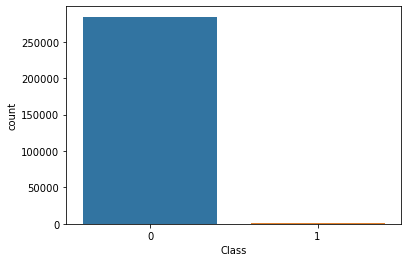

In [4]:
sns.countplot(df['Class'])
plt.show()

seeems like the data is imbalanced so we need imbalanced learn package

In [5]:
from imblearn.over_sampling import SMOTE


In [6]:
#let's do some EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


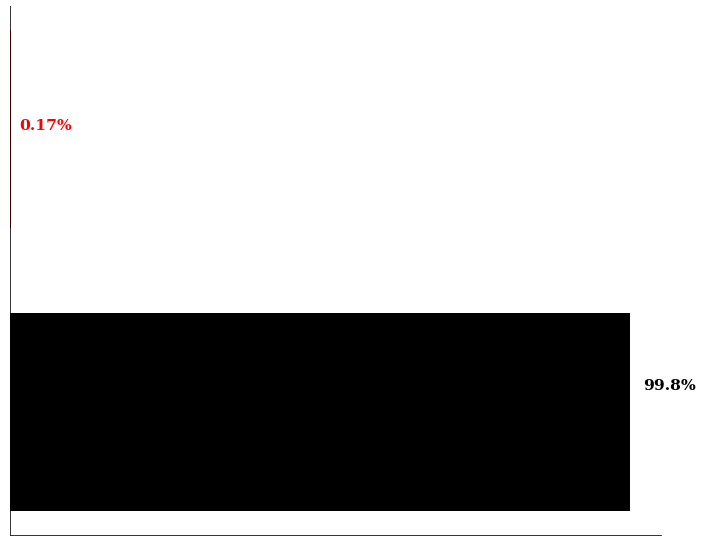

In [9]:
#let's visualize classes
d1= pd.DataFrame(df.groupby(['Class'])['Class'].count())
fig,axes=plt.subplots(figsize= (12,10), dpi= 70)
axes.barh([0],d1.Class[0], height= 0.7, color= 'black')
plt.text(290000,0.08, '99.8%',{'fontname':'Serif','weight':'bold' ,'size':'16','color':'black'})
axes.barh([1], d1.Class[1] ,height= 0.7, color= 'red')
plt.text(3900,1, '0.17%',{'fontname':'Serif', 'weight':'bold','size':'16','color':'red'})

axes.axes.get_xaxis().set_visible(False)
axes.axes.get_yaxis().set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.show()


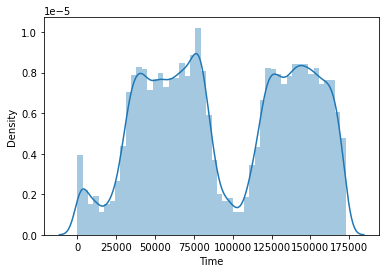

In [10]:
#let's do it without sampling and with oversampling
sns.distplot(df['Time'])
plt.show()

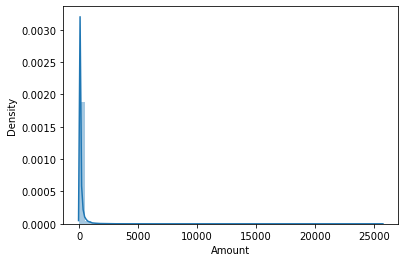

In [11]:
sns.distplot(df['Amount'])
plt.show()

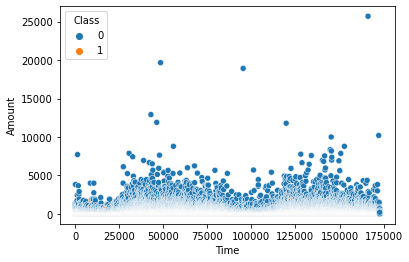

In [12]:
sns.scatterplot(x= 'Time', y='Amount', hue= 'Class', data = df)

plt.show()

<AxesSubplot:xlabel='Class', ylabel='Amount'>

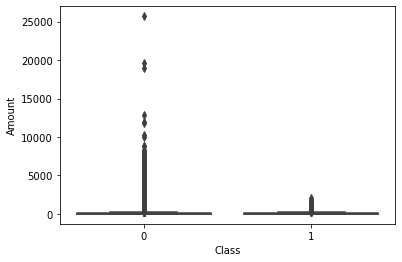

In [13]:
sns.boxplot(x=df['Class'], y=df['Amount'])

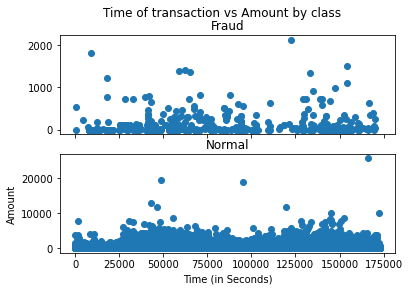

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(df[df.Class==1].Time, df[df.Class==1].Amount)
ax1.set_title('Fraud')

ax2.scatter(df[df.Class == 0].Time, df[df.Class == 0].Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

looks like there are outliers  time really do not play role so remove it 

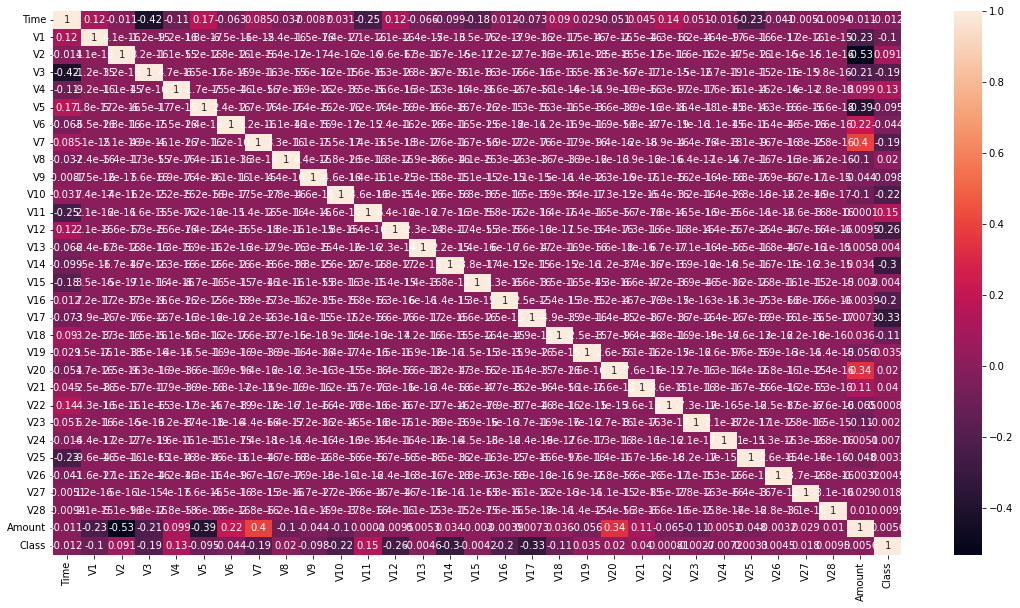

In [15]:
#let's checl correrlation now
plt.figure(figsize= (19,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [16]:
#becuasue of outliers let;s scale it
from sklearn.preprocessing import RobustScaler

rbst= RobustScaler()



In [17]:
df['Amount']= rbst.fit_transform(df['Amount'].values.reshape(-1,1))


In [18]:
target = 'Class'
predictors = [ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

### splitting training and testing set

In [19]:
X= df.drop(['Class','Time'], axis =1)
Y= df.Class.values

In [20]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680


##### importing relevant libraries


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier as Knn


from sklearn.ensemble import IsolationForest


from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [23]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size= 0.2, random_state= 10)

In [24]:
# a fucntion to see things easi;ly
def predict(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print("roc_score",roc_auc_score(y_test, preds))
    print("Precision :",metrics.precision_score(y_test, preds))
    print("Recall :",metrics.recall_score(y_test, preds))
    plt.plot(figsize=(27,12))
    
    plt.title("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt='0.0f',cmap="YlGnBu")

   
    plt.show()
   
    
    return accuracy_score(y_test,preds)


In [25]:
# a fucntion to see things easi;ly
def predict2(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print("Precision :",metrics.precision_score(y_test, preds))
    print("Recall :",metrics.recall_score(y_test, preds))
    print("roc_score",roc_auc_score(y_test, preds))
    fig, axes = plt.subplots(1,2,figsize=(27,12))
    
    axes[0].set_title("Confusion Matrix")
    sns.heatmap(confusion_matrix(y_test,preds),annot=True,fmt='0.0f',ax=axes[0],cmap="YlGnBu")

    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp,color='red',ax=axes[1])
    axes[1].set_title("Feature Importance")
    plt.show()
    return accuracy_score(y_test,preds)


[[56859     9]
 [   31    63]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.88      0.67      0.76        94

    accuracy                           1.00     56962
   macro avg       0.94      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.8350272523604495
Precision : 0.875
Recall : 0.6702127659574468


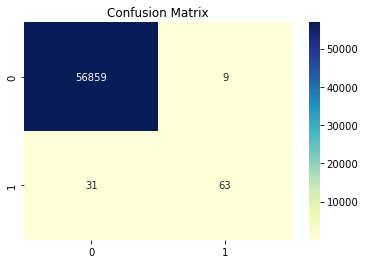

0.9992977774656788

In [26]:
predict(LogisticRegression(), X_train, X_test, y_train, y_test)

[[56867     1]
 [   21    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.78      0.87        94

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.8882890800495062
Precision : 0.9864864864864865
Recall : 0.776595744680851


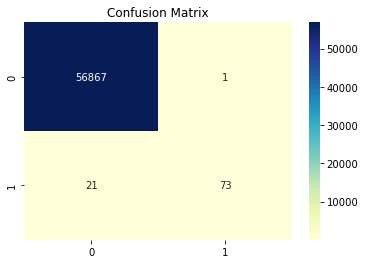

0.9996137776061234

In [27]:
predict(Knn(n_neighbors=5),X_train,X_test,y_train,y_test)

[[55580  1288]
 [   16    78]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56868
           1       0.06      0.83      0.11        94

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962

roc_score 0.90356914631719
Precision : 0.05710102489019034
Recall : 0.8297872340425532


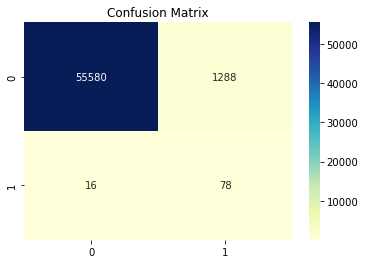

0.9771075453811313

In [28]:
predict(GaussianNB(),X_train,X_test,y_train,y_test )

now le'ts try same after sampling


In [29]:
smt = SMOTE(random_state=42)

X_smote,Y_smote = smt.fit_resample(X_train,y_train)

[[55366  1502]
 [    9    85]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56868
           1       0.05      0.90      0.10        94

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.99     56962

roc_score 0.9389216386136465
Precision : 0.05356017643352237
Recall : 0.9042553191489362


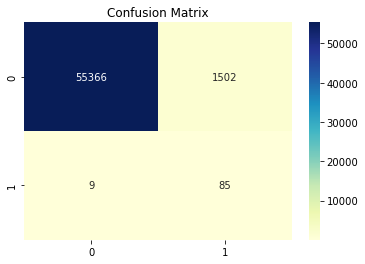

0.9734735437660195

In [30]:
predict(LogisticRegression(), X_smote, X_test, Y_smote, y_test)

[[56748   120]
 [   12    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.41      0.87      0.55        94

    accuracy                           1.00     56962
   macro avg       0.70      0.94      0.78     56962
weighted avg       1.00      1.00      1.00     56962

roc_score 0.9351151378556388
Precision : 0.40594059405940597
Recall : 0.8723404255319149


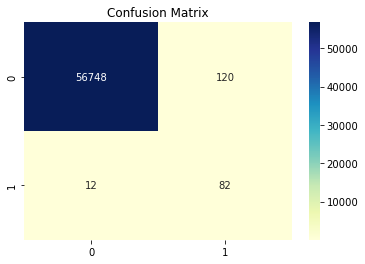

0.9976826656367402

In [31]:
predict(Knn(n_neighbors=5),X_smote,X_test,Y_smote,y_test)

[[55399  1469]
 [   14    80]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56868
           1       0.05      0.85      0.10        94

    accuracy                           0.97     56962
   macro avg       0.53      0.91      0.54     56962
weighted avg       1.00      0.97      0.99     56962

roc_score 0.9126160395331331
Precision : 0.051646223369916075
Recall : 0.851063829787234


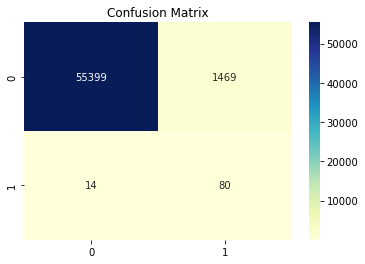

0.9739650995400443

In [32]:
predict(GaussianNB(),X_smote,X_test,Y_smote,y_test )

In [33]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680


In [34]:
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
Fraud = df[df['Class']==1]
Valid = df[df['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [36]:
outlier_fraction

0.0017304750013189597

In [37]:
n_outliers = len(Fraud)

In [38]:
state = np.random.RandomState(42)

In [39]:
model = IsolationForest(contamination= outlier_fraction, random_state = 42, verbose=1)
model.fit(X)

y_pred = model.predict(X)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished


In [40]:
y_pred[y_pred == 1] = 0  # for reshaping the prediction values
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()

In [41]:
print("erros",n_errors)

erros 707


In [42]:
print(metrics.precision_score(Y,y_pred))

0.281947261663286


In [43]:
print(metrics.recall_score(Y,y_pred))

0.28252032520325204


In [44]:
print(metrics.accuracy_score(Y,y_pred))

0.9975176171933976


In [45]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.28      0.28      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



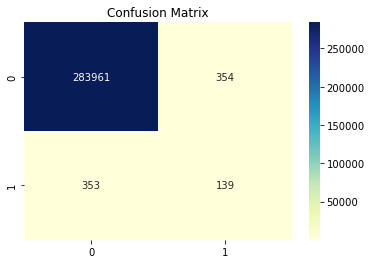

In [46]:
plt.plot(figsize=(27,12))
    
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='0.0f',cmap="YlGnBu")

   
plt.show()

In [47]:
 print("roc_score",roc_auc_score(Y,y_pred))

roc_score 0.6406376136682246


looks like ML models are quite good for these but accuracy does decrease when you use balanced data now let's try some neural networks on these

In [48]:
#let's try with imbalanced data for now
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers


In [49]:
n_inputs = len(X_train.columns)

Using auto encoders now

In [50]:
card_df= pd.read_csv("creditcard.csv", sep= ',')

In [51]:
normal_trans = card_df[card_df['Class'] == 0].sample(4000)
fraud_trans = card_df[card_df['Class'] == 1]

In [52]:
reduced_set = normal_trans.append(fraud_trans).reset_index(drop=True)

In [53]:
# Splitting the dataset into X and y features
y = reduced_set['Class']
X = reduced_set.drop(['Class','Time'], axis=1)

In [54]:
from sklearn.manifold import TSNE

Let's visualize the data using T-Sne

In [55]:
def dimensionality_plot(X, y):
    sns.set(style='whitegrid', palette='muted')
    # Initializing TSNE object with 2 principal components
    tsne = TSNE(n_components=2, random_state = 42)
    
    # Fitting the data
    X_trans = tsne.fit_transform(X)
    plt.scatter(X_trans[np.where(y == 0), 0], 
                 X_trans[np.where(y==0), 1], marker='o',
                 color='g', alpha=0.8, label='Normal')
    plt.scatter(X_trans[np.where(y == 1), 0], 
                 X_trans[np.where(y==1), 1], marker='o',
                 color='b', alpha=0.8, label='Fraud')
    plt.legend()
    plt.show()
    
       

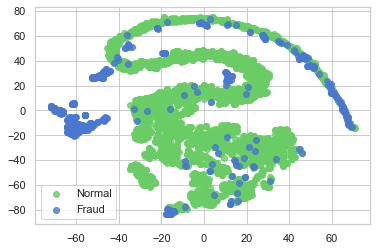

In [56]:
dimensionality_plot(X, y)

as we can see it is hard to separate data just by using T-sne

In [57]:
scaler = RobustScaler().fit_transform(X)

# Scaled data
X_scaled_normal = scaler[y == 0]
X_scaled_fraud = scaler[y == 1]

In [58]:
autoencoder= tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(X_scaled_normal.shape[1],),

## encoding part
    tf.keras.layers. Dense(100, activation='relu',activity_regularizer=regularizers.l1(1e-5)),
    
    tf.keras.layers. Dense(50, activation='relu'),
    tf.keras.layers. Dense(25, activation='relu'),
    tf.keras.layers. Dense(12, activation='relu'),
    tf.keras.layers. Dense(6, activation='relu'),
  
#deconding part
    tf.keras.layers. Dense(12, activation='relu'),
    tf.keras.layers. Dense(25, activation='relu'),
    tf.keras.layers. Dense(50, activation='relu'),
    tf.keras.layers. Dense(100, activation='relu'),
    tf.keras.layers. Dense(X_scaled_normal.shape[1], activation='relu'),
])

In [59]:
autoencoder.compile(optimizer='adam', loss= 'mse', metrics= ['accuracy'])

In [60]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_5 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_6 (Dense)              (None, 25)                3

In [61]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience= 15, restore_best_weights=True)

In [62]:
history = autoencoder.fit(X_scaled_normal, X_scaled_normal,epochs= 50,batch_size=32, validation_split=0.2, verbose= 1, callbacks=[early])

Epoch 1/50
100/100 [==============================] - 2s 9ms/step - loss: 1.2552 - accuracy: 0.1475 - val_loss: 1.1762 - val_accuracy: 0.1500
Epoch 2/50
100/100 [==============================] - 1s 5ms/step - loss: 1.1186 - accuracy: 0.1869 - val_loss: 1.1391 - val_accuracy: 0.1713
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: 1.0125 - accuracy: 0.2222 - val_loss: 1.1267 - val_accuracy: 0.2125
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: 1.0352 - accuracy: 0.2547 - val_loss: 1.1112 - val_accuracy: 0.2362
Epoch 5/50
100/100 [==============================] - 1s 6ms/step - loss: 1.0535 - accuracy: 0.2697 - val_loss: 1.0965 - val_accuracy: 0.2488
Epoch 6/50
100/100 [==============================] - 1s 5ms/step - loss: 0.9830 - accuracy: 0.2794 - val_loss: 1.0911 - val_accuracy: 0.2525
Epoch 7/50
100/100 [==============================] - 1s 5ms/step - loss: 0.9503 - accuracy: 0.3028 - val_loss: 1.0730 - val_accuracy: 0.2788
Epoch 

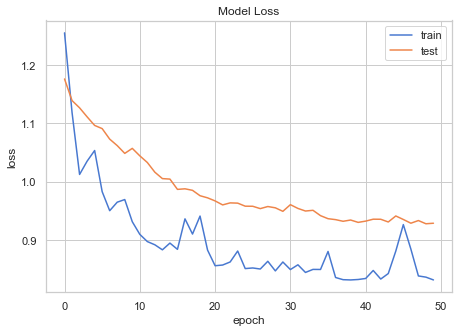

In [63]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');


plt.show()

In [64]:
#now let's obtain latent representation of the input
hidden_represent= Sequential()
hidden_represent.add(autoencoder.layers[0])
hidden_represent.add(autoencoder.layers[1])
hidden_represent.add(autoencoder.layers[2])
hidden_represent.add(autoencoder.layers[3])
hidden_represent.add(autoencoder.layers[4])





In [65]:
norm_hid_rep = hidden_represent.predict(X_scaled_normal)
fraud_hid_rep = hidden_represent.predict(X_scaled_fraud)

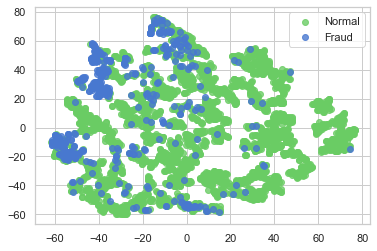

In [66]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f,axis =0)
dimensionality_plot(rep_x, rep_y)

this is better given we trained autoencoder using nonfraud datasets only

In [67]:
#now let's train same model using whole dataset

In [68]:
X_train,X_test= train_test_split(card_df,test_size= 0.2, random_state= 42)

In [69]:
X_train = X_train[X_train.Class==0]
X_train = X_train.drop(['Class','Time'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class','Time'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [70]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (227451, 29)
Shape of X_test: (56962, 29)


In [71]:
history = autoencoder.fit(X_train, X_train,epochs= 50, batch_size=64,validation_split=0.2, verbose= 1,callbacks=[early])

Epoch 1/50
2844/2844 [==============================] - 22s 8ms/step - loss: 12.9628 - accuracy: 0.9082 - val_loss: 0.9181 - val_accuracy: 0.9211
Epoch 2/50
2844/2844 [==============================] - 21s 7ms/step - loss: 1.8245 - accuracy: 0.9126 - val_loss: 0.9555 - val_accuracy: 0.9094
Epoch 3/50
2844/2844 [==============================] - 22s 8ms/step - loss: 4.1992 - accuracy: 0.9077 - val_loss: 19.3958 - val_accuracy: 0.8857
Epoch 4/50
2844/2844 [==============================] - 20s 7ms/step - loss: 8.4475 - accuracy: 0.9065 - val_loss: 0.9240 - val_accuracy: 0.9155
Epoch 5/50
2844/2844 [==============================] - 14s 5ms/step - loss: 1.0405 - accuracy: 0.9146 - val_loss: 0.8911 - val_accuracy: 0.9190
Epoch 6/50
2844/2844 [==============================] - 14s 5ms/step - loss: 3.2259 - accuracy: 0.9144 - val_loss: 0.9031 - val_accuracy: 0.9199
Epoch 7/50
2844/2844 [==============================] - 13s 5ms/step - loss: 2.6095 - accuracy: 0.9165 - val_loss: 1.0059 - val_

it stopped since after epochs 16 it did not  decrease by much

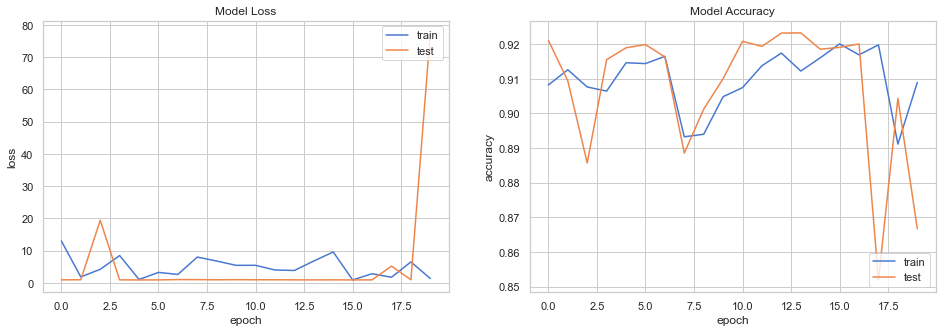

In [72]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')


plt.show()

In [73]:
prediction = autoencoder.predict(X_test)

In [74]:
mse = np.mean(np.power(X_test - prediction, 2), axis=1)
error = pd.DataFrame({'reconstruction_error': mse, 'actual_class': y_test})

In [75]:
without_fraud = error[error.actual_class==0]
with_fraud = error[error.actual_class==1]

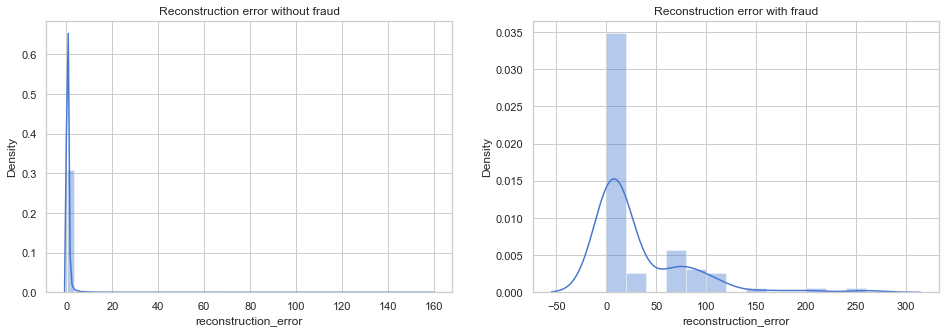

In [76]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(without_fraud["reconstruction_error"])
plt.title("Reconstruction error without fraud")

plt.subplot(1,2,2)
sns.distplot(with_fraud["reconstruction_error"])
plt.title("Reconstruction error with fraud")

plt.show()

In [77]:
mse = np.mean(np.power(X_test -prediction, 2), axis=1)

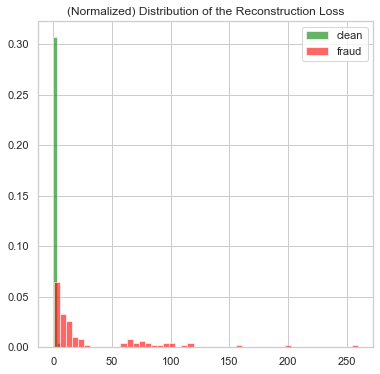

In [78]:
clean = mse[y_test==0]
fraud = mse[y_test==1]

fig, ax = plt.subplots(figsize=(6,6))

ax.hist(clean, bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud, bins=50, density=True, label="fraud", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

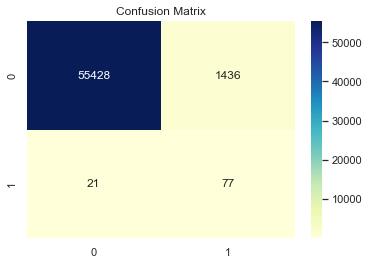

In [79]:
y_pred = [1 if e > 3 else 0 for e in error.reconstruction_error.values]
plt.plot(figsize=(27,12))
    
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.0f',cmap="YlGnBu")

   
plt.show()

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.79      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.88      0.54     56962
weighted avg       1.00      0.97      0.99     56962



In [81]:
print(metrics.precision_score(y_test,y_pred))

0.050892267019167214


looks like 20 were not identified


In [82]:
print(metrics.recall_score(y_test,y_pred))

0.7857142857142857


In [83]:
print(metrics.accuracy_score(y_test,y_pred))

0.9744215441873529


In [84]:
 print("roc_score",roc_auc_score(y_test,y_pred))

roc_score 0.8802305249618135


In [85]:
y_pred = [1 if e > 2 else 0 for e in error.reconstruction_error.values]

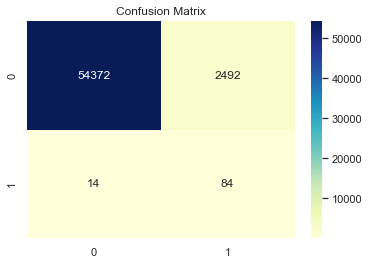

In [86]:
plt.plot(figsize=(27,12))
    
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.0f',cmap="YlGnBu")

   
plt.show()

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.86      0.06        98

    accuracy                           0.96     56962
   macro avg       0.52      0.91      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [88]:
 print("roc_score",roc_auc_score(y_test,y_pred))

roc_score 0.9066594983519576


In [89]:
print(metrics.precision_score(y_test,y_pred))

0.03260869565217391


In [90]:
print(metrics.recall_score(y_test,y_pred))

0.8571428571428571


In [91]:
print(metrics.accuracy_score(y_test,y_pred))

0.9560057582247814
